<style>
li, p{
  line-height: 2;
}
</style>

> <h1>Superdense Coding</h1>
<br>

<div>
<img src="/workspaces/Quantum-Playground/Figures/superdenseCoding.drawio.png">
</div>
<br>

> <h2>How it works?</h2>
> <p>It is an algorithm to send 2 bits of information with the help of quantum entanglement. Assume in a 2 qubit system, after creating a Bell state, Alice and Bob takes each one of the qubit and moves to the other universes. Now Alice wants to send 2 classical bit of information to Bob. So she encodes her qubit. On the other hand, to receive the information Bob has to decode (un-entangle) his qubit. And this will happen instantaniously. We have to keep in mind that Bob will never know when Alice will send him information. Moreover, Alice will never send him a text saying,"Hi!, I've send you 2 bit of information, please decode your part." Instead, she could just text him the information.</p>
<br>

> Steps:
<p>
  <ol>
    <li>Initially, ψ<sub>1</sub> = |00></li>
    <li>Initialization: Maximally entangled stage of two qubits (Bell states, or EPR pair) takes place. Each party has the half of the entangled pair. <span style="color:red">Alice</span> posses the first part, and <span style="color:green">Bob</span> has the second.
    ψ<sub>2</sub> = 1/√2(|<span style="color:red">0</span><span style="color:green">0</span>> + |<span style="color:red">1</span><span style="color:green">1</span>>) = φ<sup>+</sup>
    </li>
    <li>Alice encodes her part based on which 2-bits pair she wants to send. Which basically converts the current Bell state to another Bell state.<br>
    <ul>
      <li><b>00</b>: <br>ψ<sub>3</sub> = Idψ<sub>2</sub><br>
                                = ψ<sub>2</sub> <br>
                                = φ<sup>+</sup>
      </li>
      <li><b>01</b>: <br>ψ<sub>3</sub> = Xψ<sub>2</sub><br>
                                = 1/√2(|10> + |01>)<br>
                                = ψ<sup>+</sup>
      </li>
      <li><b>10</b>: <br>ψ<sub>3</sub> = Zψ<sub>2</sub><br>
                                = 1/√2(|00> - |11>)<br>
                                = φ<sup>-</sup>
      </li>
      <li><b>11</b>: <br>ψ<sub>3</sub> = XZψ<sub>2</sub><br>
                                = 1/√2(|10> - |01>)<br>
                                = ψ<sup>-</sup>
      </li>
    </ul>
    So we can see that encoding φ<sup>+</sup> will convert to other Bell states, φ<sup>-</sup>, ψ<sup>+</sup>, and ψ<sup>-</sup>.
    </li>
    <li><b>Bob's Decoding</b>: In this step, Bob decodes or un-entangle his qubit to retrieve information. He performs Hadamard followed by cnot. ψ<sub>4</sub> = H (cx ψ<sub>3</sub>) = |00> or |01> or |10> or |11></li>
  </ol>
</p>

In [4]:
# Implementation
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from math import pi
%matplotlib inline

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


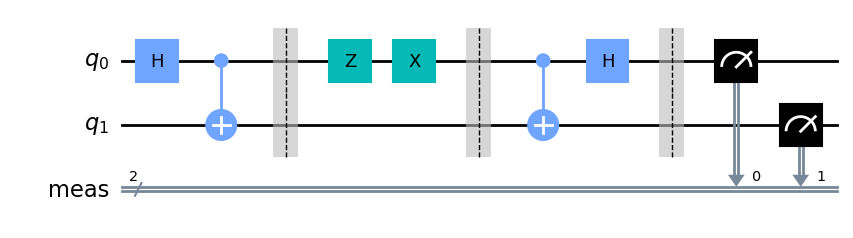

In [5]:
# Initialization/Bell state creation
ckt = QuantumCircuit(2)
ckt.h(0)
ckt.cx(0,1)
ckt.barrier()


# Alice's Encoding
msg = '11'

if msg=='00':
  ckt.id(0)
elif msg=='01':
  ckt.x(0)
elif msg=='10':
  ckt.z(0)
else:
  ckt.z(0)
  ckt.x(0)
ckt.barrier()

# Bob's Decoding
ckt.cx(0,1)
ckt.h(0)

# Bob measures and retrieves the message
ckt.measure_all()
ckt.draw(output='mpl')

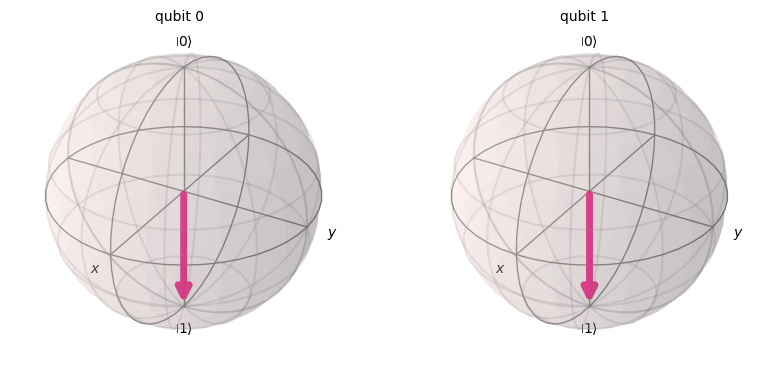

In [6]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(ckt, backend=simulator).result()
plot_bloch_multivector(result.get_statevector())